<a href="https://colab.research.google.com/github/ToanToan110/CS114.K21/blob/master/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as implt
import os
import seaborn as sns
import cv2 as cv
from PIL import Image
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
!unzip '/content/drive/My Drive/DataSet_Male_female/Dataset_Male_female.zip'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (3337).png  
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (3338).png  
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (3339).png  
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (334).png  
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (3340).png  
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (3341).png  
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (3342).png  
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (3343).png  
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (3344).png  
  inflating: Dataset_Male_female/genderdetectionface/dataset1/train/woman/face (3345).png  
  inflating: Dataset_Mal

In [ ]:
#!unzip 'drive/My Drive/finalprojectML/genderdetection.zip'

In [13]:

train_path = "/content/Dataset_Male_female/genderdetectionface/dataset1/train"
test_path = "/content/Dataset_Male_female/genderdetectionface/dataset1/test"

train_woman = sorted(os.listdir(train_path +'/woman'))
train_man =  sorted(os.listdir(train_path +'/man'))

test_woman = sorted(os.listdir(test_path +'/woman'))
test_man =  sorted(os.listdir(test_path +'/man'))

Text(0.5, 1.0, 'Số lương hình ảnh được huấn luyện:')

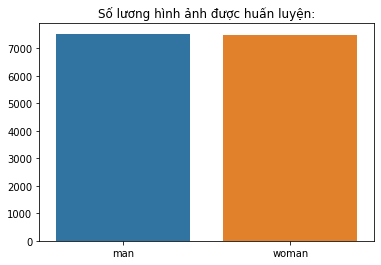

In [14]:
category_names = sorted(os.listdir(train_path))
img_pr_cat = []
for category in category_names:
    folder = train_path + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(x=category_names, y=img_pr_cat).set_title("Số lương hình ảnh được huấn luyện:")


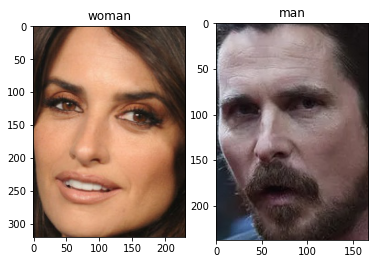

In [15]:
img_1 = implt.imread(train_path +'/woman/face_561.jpg')
img_2 = implt.imread(train_path +'/man/face_999.jpg')

plt.subplot(1, 2, 1)
plt.title('woman')
plt.imshow(img_1)       
plt.subplot(1, 2, 2)
plt.title('man')
plt.imshow(img_2) 

In [16]:
img_size = 50
women_faces = []
men_faces = [] 
label = []

for i in train_woman:
        
        if os.path.isfile(train_path +'/woman/'+ i):
            faces = Image.open(train_path +'/woman/'+ i).convert('L') #Chuyển thành ảnh xám            
            faces = faces.resize((img_size,img_size), Image.ANTIALIAS) #resizing thành 50,50
            faces = np.asarray(faces)/255.0 #normalizing images
            women_faces.append(faces)  
            label.append(1) #1 là nữ
 
for i in train_man:
        if os.path.isfile(train_path+'/man/'+ i):
            faces = Image.open(train_path+'/man/'+ i).convert('L')
            faces = faces.resize((img_size,img_size), Image.ANTIALIAS)
            faces = np.asarray(faces)/255.0 #normalizing images
            men_faces.append(faces)  
            label.append(0) #0 là nam         
           
x_train = np.concatenate((women_faces,men_faces),axis=0) # Ghép lại và huấn luyện dữ liệu
x_train_label = np.asarray(label)# mảng label gồm 0 và 1
x_train_label = x_train_label.reshape(x_train_label.shape[0],1)#nhãn sẽ có 1 cột và số hàng bằng số train_dataset

print("women_faces:",np.shape(women_faces) , "men_faces:",np.shape(men_faces))
print("train_dataset:",np.shape(x_train), "train_values:",np.shape(x_train_label))

women_faces: (7490, 50, 50) men_faces: (7531, 50, 50)
train_dataset: (15021, 50, 50) train_values: (15021, 1)


Làm tương tự với tập test:

In [17]:
img_size = 50
women_faces = []
men_faces = [] 
label = []

for i in test_woman:
        if os.path.isfile(test_path +'/woman/'+ i):
            faces = Image.open(test_path +'/woman/'+ i).convert('L')            
            faces = faces.resize((img_size,img_size), Image.ANTIALIAS)
            faces = np.asarray(faces)/255.0
            women_faces.append(faces)  
            label.append(1)     
 
for i in test_man:
        if os.path.isfile(test_path+'/man/'+ i):
            faces = Image.open(test_path+'/man/'+ i).convert('L')
            faces = faces.resize((img_size,img_size), Image.ANTIALIAS)
            faces = np.asarray(faces)/255.0            
            men_faces.append(faces)
            label.append(0)                       

x_test = np.concatenate((women_faces,men_faces),axis=0) # test dataset
x_test_label = np.asarray(label) # corresponding labels
x_test_label = x_test_label.reshape(x_test_label.shape[0],1)

print("women_faces:",np.shape(women_faces), "men_faces:",np.shape(men_faces))
print("test_dataset:",np.shape(x_test), "test_values:",np.shape(x_test_label))

women_faces: (778, 50, 50) men_faces: (805, 50, 50)
test_dataset: (1583, 50, 50) test_values: (1583, 1)


In [18]:
###2 dòng
x = np.concatenate((x_train,x_test),axis=0) #train_data
y = np.concatenate((x_train_label,x_test_label),axis=0) #test data
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]) #flatten 3D image array to 2D
print("images:",np.shape(x), "labels:",np.shape(y))

images: (16604, 2500) labels: (16604, 1)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("train number:",len(X_train), "test number:",len(X_test))

train number: 13283 test number: 3321


**Chuyển vị ma trận tập train và test để tiện cho việc tính toán:**

In [26]:
x_train = X_train.T
x_test = X_test.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (2500, 13283)
x test:  (2500, 3321)
y train:  (1, 13283)
y test:  (1, 3321)


**Các model**


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
# Xây dưng model
# thêm các model và thuật toán vào danh sách model
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('PT', Perceptron()))
# Tính toán lần lượt từng model
results = []
names = []
s = []
mean = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	mean.append(cv_results.mean())
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.781451 (0.010979)
LDA: 0.752618 (0.012936)
KNN: 0.793043 (0.009433)
CART: 0.710984 (0.007269)
NB: 0.729807 (0.011889)
SVM: 0.799896 (0.011081)
PT: 0.733575 (0.055477)


In [20]:
from sklearn.neighbors import KNeighborsClassifier
k= KNeighborsClassifier()
k.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
import pickle 
# Save the trained model as a pickle string. 
filename = '/content/drive/My Drive/Model/a.sav'
pickle.dump(k, open(filename, 'wb'))

In [23]:
# Load the pickled model 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.7886178861788617


Text(0, 0.5, 'accuracy')

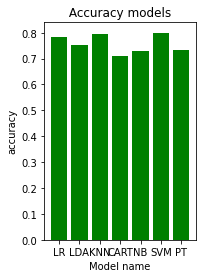

In [19]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.bar(names,mean,color='green', label =' accuracy')
plt.title(' Accuracy models ')
plt.xlabel('Model name')
plt.ylabel('accuracy')

**Logicstic regression với sklearn:**

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
test_acc_logregsk = round(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)* 100, 2)
train_acc_logregsk = round(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)* 100, 2)
logreg.fit(x_train.T,y_train.T)

NameError: ignored

In [21]:
perceptron = Perceptron()
test_acc_perceptron = round(perceptron.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)* 100, 2)
train_acc_perceptron = round(perceptron.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)* 100, 2)
perceptron.fit(x_train.T,y_train.T)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

**So sánh các model:**

In [7]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix , precision_score, recall_score
import cv2
import numpy as np
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
def detect (img):
  img_1 = img
  input = img
  ##cv2_imshow(img_1)
  input = cv2.cvtColor(input, cv2.COLOR_RGB2GRAY)
  input = cv2.resize(input,(50,50), Image.ANTIALIAS)
  input = np.reshape(input, 50*50)
  input = (np.asarray(input)/255.0)   
  result = logreg.predict([input])
  return(result)


Using TensorFlow backend.


In [4]:
!pip install dlib
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=fc0cb08c4a2fd578915ab1f4fefc8824e5006b88c294b72cf6fbf8142f9f3134
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [5]:
import face_recognition

In [1]:
from google.colab import files
uploaded = files.upload()

Saving 109783587_287221932359261_7903660508333721988_n.jpg to 109783587_287221932359261_7903660508333721988_n.jpg


User uploaded file "109783587_287221932359261_7903660508333721988_n.jpg" with length 59647 bytes


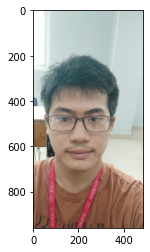

Found 1 face(s) in this photograph.
A face is located at pixel location Top: 409, Left: 82, Bottom: 676, Right: 349


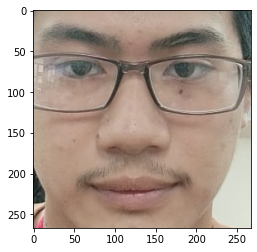

NameError: ignored

In [8]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

  image = face_recognition.load_image_file(fn)

  plt.imshow(image)
  plt.show()  
  
  face_locations = face_recognition.face_locations(image)

  print("Found {} face(s) in this photograph.".format(len(face_locations)))

  for face_location in face_locations:
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    face_image = image[top:bottom, left:right]
    plt.imshow(face_image)
    plt.show()
    if detect(face_image):
      print( "               Female")
    else:
      print("                Male")
    

In [ ]:
import pickle 
# Save the trained model as a pickle string. 
saved_model = pickle.dumps(perceptron) 
  


In [ ]:
# Load the pickled model 
per_from_pickle = pickle.loads(saved_model) 